In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Simulation of Gaussian processes using Choleski Decomposition

The time-interval $[0,1]$ is decomposed onto $t_0,t_1...t_{N_t}$ time steps

The prescribed correlation matrix $C_{ij}:= C(t_i,t_j) $ with $i,j > 0$ is decomposed as 

 $C=LL^T$ with L a lower triangular matrix (cholesky decomposition).

Using $\Delta \in \mathcal R^{N_t-1}$ a random vector with entries $\Delta_i \simeq N(0,1) $ iid, a realisation of the desired Gaussian process can be  obtained as
$X := U \Delta$, namely
$X(t_i):= U_{ij} \Delta_j$  



In [2]:
class Gaussian_Choleski:
        def __init__(self,NT=200,M=5000,c=lambda t : lambda s: 0.5*(s+t-np.abs(s-t)),kappa=1,figheight=figheight):
            self.NT=NT #parameters
            self.M=M #Number of points
            self.kappa=1
            
            self.figheight=figheight
            t=np.arange(1,NT)/NT
            tt=np.meshgrid(t,t)

            self.Time=np.zeros(NT)
            self.Time[1:]=t
            self.gamma=c(tt[0])(tt[1]) ## CORRELATION MATRIX
            
            self.L=np.linalg.cholesky(self.gamma)
            self.Z=np.zeros((NT,M))
            for i in range(self.M):
                Delta=np.random.randn(NT-1,1)*sqrt(kappa)
                X=self.L@Delta
                self.Z[1:,i]=X[:].flatten()

        def show(self,norm=True,figheight=None,every=100):
            if figheight is None:figheight=self.figheight
            Time=self.Time
            Z=self.Z
            kappa=self.kappa
            
            fig,ax=subplots(1,3,figsize=(3*figheight,figheight))

            #SAMPLES
            for i in range(0,self.M,every):
                ax[0].plot(self.Time,self.Z[:,i])
                ax[0].set_xlim(0,1)
                ax[0].set_xlabel('time')
                ax[0].set_ylabel('$W_t$')
                ax[0].grid('on')

            ##AVERAGES
            ia=1
            ax[ia].plot(Time,Z.mean(axis=1),label='$<W_t>$')
            ax[ia].plot(Time,np.sqrt((Z**2).mean(axis=1)),label='$<W_t^2>^{1/2}$')
#            ax[ia].plot(Time,np.sqrt(kappa*Time),'k--',label='$\sqrt{\kappa t}$')
            ax[ia].legend()
            ax[ia].set_xlim(0,1)
            ax[ia].set_ylim(-1,2)
            ax[ia].set_xlabel('time')
            ax[ia].set_ylabel('Averages')
            ax[ia].grid('on')

            ##PDF
            ia=2
            cool=cm.rainbow(np.linspace(0,1,self.NT))
            for i in range(1,self.NT,10):
                if norm:
                    data=(Z[i,:]-Z[i,:].mean())/(Z[i,:].var()**(0.5)) ; XLABEL= '$W_t/ <W_t^2>^{1/2}$'
                else:   data=Z[i,:] ; XLABEL= '$W_t$'
                pdf,cl=np.histogram(data,40,density=True)
                cl=(cl[1:]+cl[:-1])*0.5
                #    print(sum(pdf*(cl[2]-cl[1])))
                ax[ia].plot(cl,pdf,color=cool[i,:])
            ax[ia].plot(cl,np.sqrt(1/(2*pi))*np.exp(-cl**2*0.5),'k--',label='Gaussian')

            ax[ia].legend()
            ax[ia].set_xlabel(XLABEL)
            ax[ia].set_ylabel('pdf')
            ax[ia].grid('on')
            ax[ia].set_yscale('log')

            tight_layout()
            return fig,ax

# 1) Brownian Motion
$C(s,t) = min(s,t)$

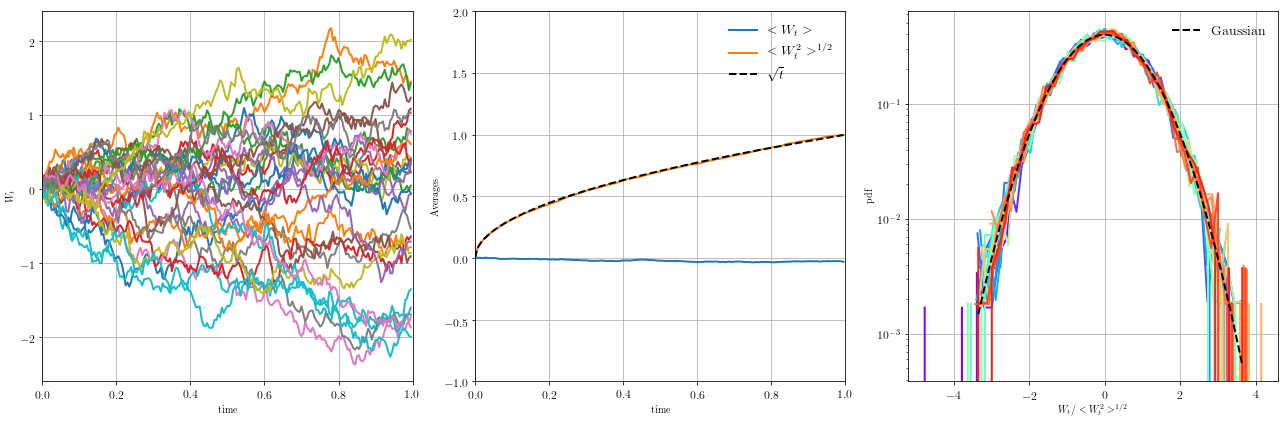

In [3]:
bm=Gaussian_Choleski(NT=200,M=3000,c=lambda t : lambda s: 0.5*(s+t-np.abs(s-t)))
fig,ax=bm.show(norm=True)

ax[1].plot(bm.Time,np.sqrt(bm.Time),'k--',label='$\sqrt{t}$')
ax[1].legend()
ax[2].set_yscale('log')

# 2) Brownian Bridge
$C(s,t) = min(s,t) -st$

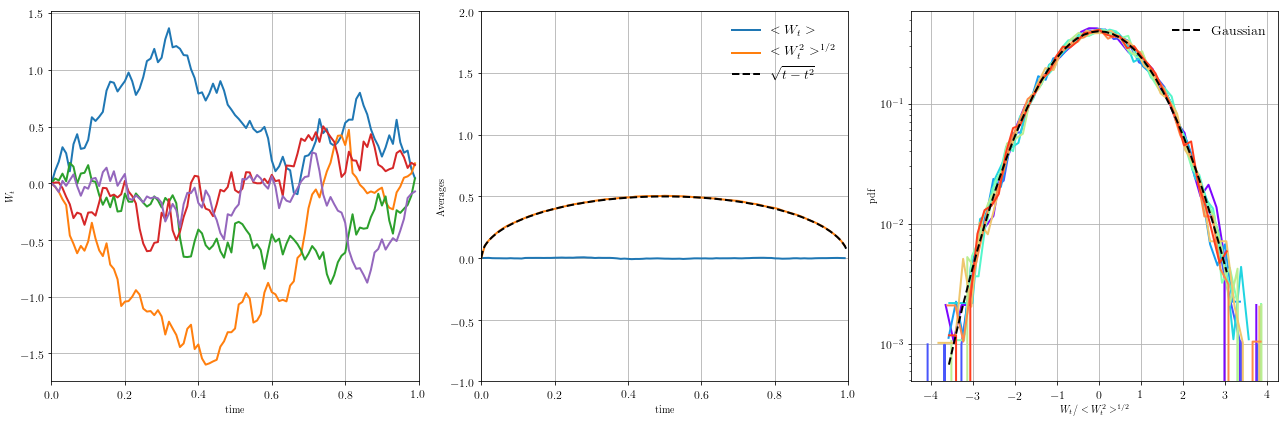

In [4]:
bb=Gaussian_Choleski(NT=100,M=5000,c=lambda t : lambda s: 0.5*(s+t-np.abs(s-t))-s*t)
fig,ax=bb.show(every=1000,norm=True)
ax[1].plot(bm.Time,np.sqrt(bm.Time-bm.Time**2),'k--',label='$\sqrt{t-t^2}$')
ax[1].legend()
ax[2].set_yscale('log')

## 3) Ornstein-Uhlenbeck
$C(s,t) = e^{-|t-s|}$

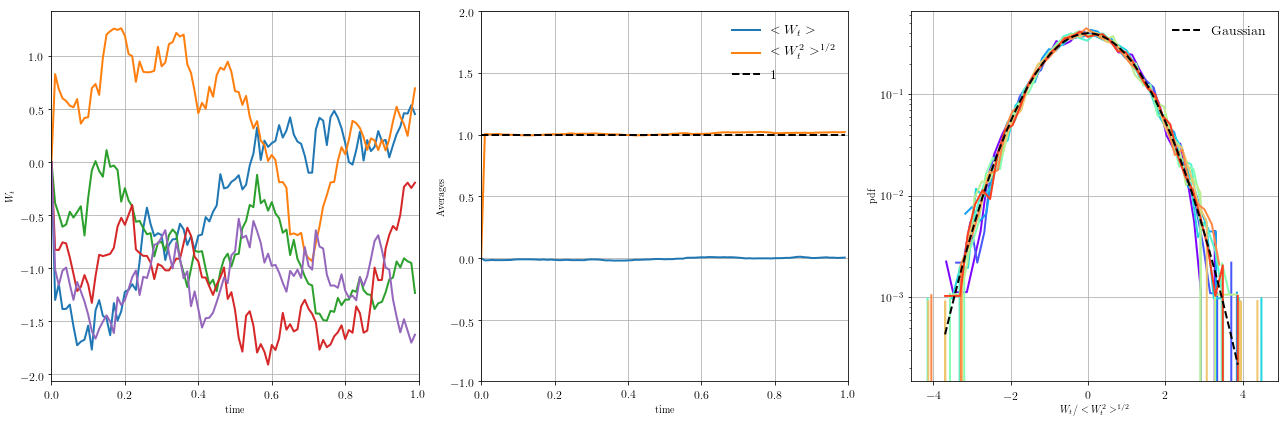

In [5]:
bb=Gaussian_Choleski(NT=100,M=5000,c=lambda t : lambda s: np.exp(-np.abs(s-t)))
fig,ax=bb.show(every=1000,norm=True)
ax[1].plot(bb.Time,bb.Time*0+1,'k--',label='$1$')
ax[1].legend()

ax[2].set_yscale('log')

# 4) Fractional BM
$C(s,t) = s^{2H}+t^{2H} -|t-s|^{2H}$
$H\in [0,1]$


$H=0.2$

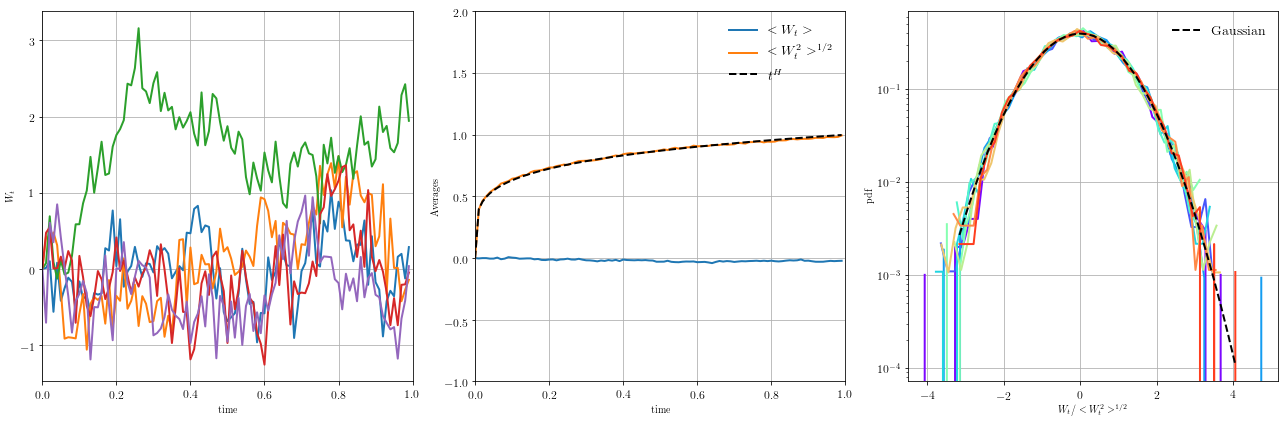

In [6]:
H=0.2
fbm=Gaussian_Choleski(NT=100,M=5000,c=lambda t : lambda s: 0.5*(s**(2*H)+t**(2*H)-np.abs(s-t)**(2*H)))
fig,ax=fbm.show(every=1000,norm=True)
ax[1].plot(fbm.Time,fbm.Time**H,'k--',label='$t^{H}$')
ax[1].legend() ; ax[2].set_yscale('log');

$H=0.8$

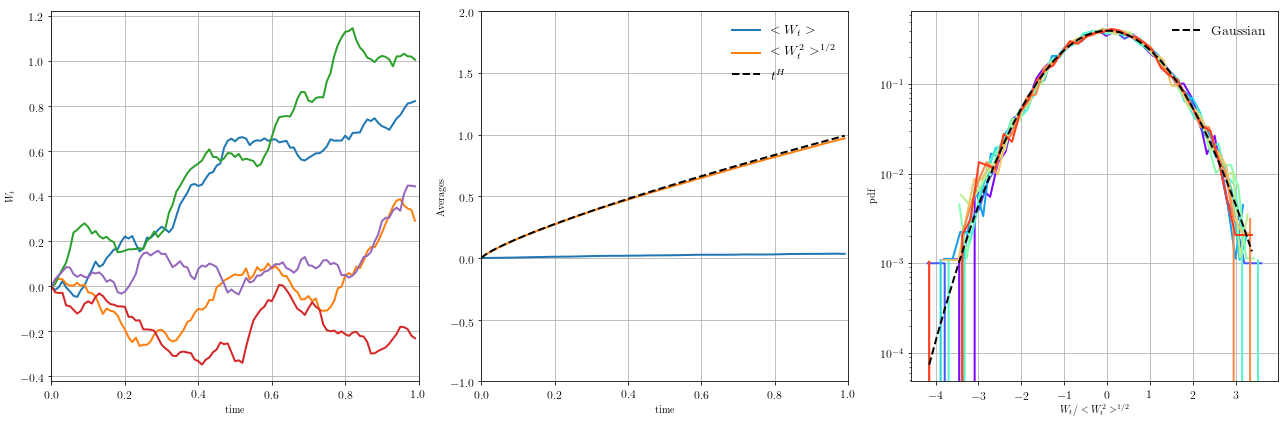

In [7]:
H=0.8
fbm=Gaussian_Choleski(NT=100,M=5000,c=lambda t : lambda s: 0.5*(s**(2*H)+t**(2*H)-np.abs(s-t)**(2*H)))
fig,ax=fbm.show(every=1000,norm=True)
ax[1].plot(fbm.Time,fbm.Time**H,'k--',label='$t^{H}$')
ax[1].legend() ; ax[2].set_yscale('log');

In [8]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')